In [4]:
import numpy as np
class perceptron(object):# Определяем класс perceptron, который будет моделировать однослойный перцептрон
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):# Конструктор класса, который принимает параметры для настройки модели
        self.eta = eta # Скорость обучения (по умолчанию 0.01)eta — скорость обучения, которая влияет на то, как быстро модель обновляет веса.
#n_iter — количество эпох или итераций обучения (по сути, это количество полных проходов по обучающим данным).
#random_state — фиксирует начальное значение для генератора случайных чисел, чтобы результаты можно было воспроизвести.
        self.n_iter = n_iter # Количество итераций (по умолчанию 50)
        self.random_state = random_state # Начальное значение для генератора случайных чисел (по умолчанию 1)
    def fit(self,X,Y): #rgen — объект генератора случайных чисел, который будет использоваться для инициализации весов.
##1 + X.shape[1] означает, что размер веса зависит от количества признаков в данных X (с добавлением 1 для смещения).
#self.errors_ — список, который будет хранить количество ошибок для каждой эпохи обучения.
       rgen = np.random.RandomState(self.random_state) # Создаем объект генератора случайных чисел с заданным начальным состоянием
       self.w_= rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # Инициализируем веса нормальным распределением
       self.errors_ = [] # Список для хранения количества ошибок на каждой итерации
  
       for _ in range(self.n_iter): # Цикл по количеству итераций (эпох) #Цикл по эпохам: Прогоняет данные через перцептрон несколько раз (по числу n_iter).
#zip(X, Y) — объединяет входные данные X и целевые метки Y. Каждый элемент из X и соответствующая метка из Y обрабатываются вместе.
#update — вычисление коррекции весов на основе разности между настоящим значением и предсказанным. Это основная ошибка на основе которой обновляются веса.
#self.w_[1:] += update * xi — обновление весов для всех признаков.
#self.w_[0] += update — обновление веса для смещения.
#errors += int(update != 0.0) — если обновление веса не равно нулю, значит был сделан ошибочный прогноз, и мы увеличиваем счетчик ошибок.
            errors = 0 # Счетчик ошибок для текущей итерации
            for xi, target in zip(X, Y): # Проходим по всем примерам из обучающего набора
                update = self.eta * (target - self.predict(xi))  # Вычисляем обновление веса на основе ошибки
                self.w_[1: ] += update * xi # Обновляем веса, связанные с признаками
                self.w_[0] += update # Обновляем вес для смещения (bias)
                errors += int(update != 0.0) # Увеличиваем счетчик ошибок, если обновление веса было ненулевым
            self.errors_.append(errors) # Добавляем количество ошибок в список
       return self # Возвращаем обученный перцептрон В конце метода fit возвращается объект самой модели, чтобы можно было цепочечно вызывать другие методы, например: perceptron.fit(X, Y).predict(X).

    def net_input(self, X):  # Метод для вычисления входного сигнала нейрона
       return np.dot(X, self.w_[1: ]) + self.w_[0] # Вычисление линейной комбинации признаков и весов
    def predict(self, X):  # Метод для предсказания класса
       return np.where(self.net_input(X) >= 0.0, 1, -1)  # Возвращаем 1, если вход >= 0, иначе -1np.where(condition, 1, -1) — возвращает 1, если входной сигнал больше или равен 0, иначе —1.
#Это и есть классификация, которая делит данные на два класса.

URL: https://archive.ics.uci.edu/ml/machine-learning-databases\iris\iris.data
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


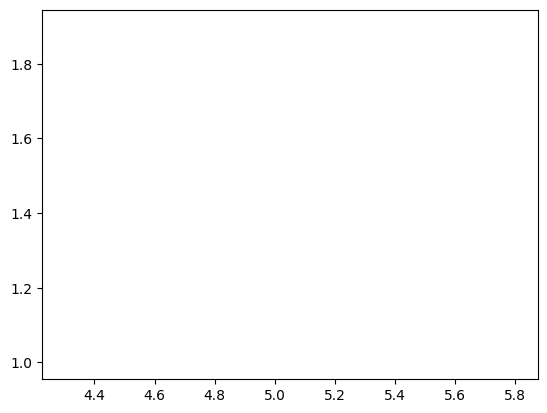

In [5]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases', 'iris', 'iris.data')

print('URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')

print(df.tail())
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setos', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = '')

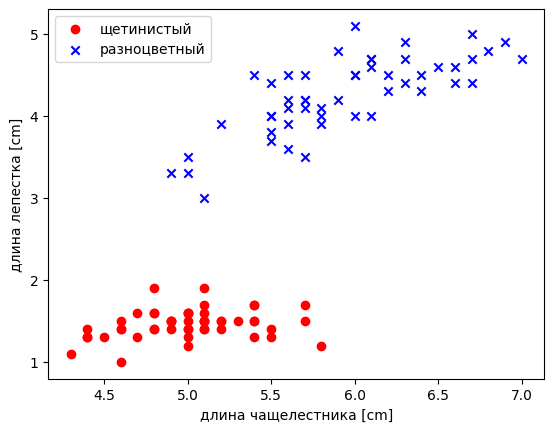

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
y = df.iloc [0:100, 4].values #извлекаем значения меток (видов цветов) из 5-го столбца для первых 100 строк DataFrame.
y = np.where(y == 'Iris-setosa', -1, 1) #преобразуем строки меток в числовые значения: -1 для сорта Iris-setosa и 1 для всех других видов. Это необходимо для дальнейшей обработки, так как модель работает с числовыми метками.
X = df.iloc[0:100, [0, 2]].values # извлекаем первые 100 строк и два признака: первый (длина чашелистика) и третий (длина лепестка).
plt.scatter(X[:50, 0], X[:50, 1], color = 'r', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'b', marker = 'x', label = 'разноцветный')
plt.xlabel ('длина чащелестника [cm]')
plt.ylabel ('длина лепестка [cm]')
plt.legend(loc = 'upper left')
plt.show()

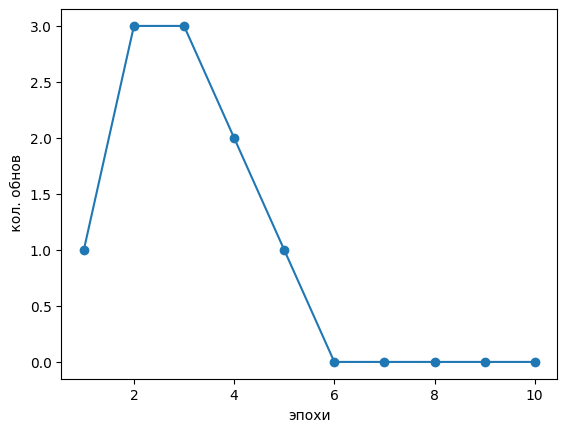

In [7]:
ppn = perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('эпохи')
plt.ylabel(' кол. обнов')
plt.show()

C:\Temp\ipykernel_14068\1426379827.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter (x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c=colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')


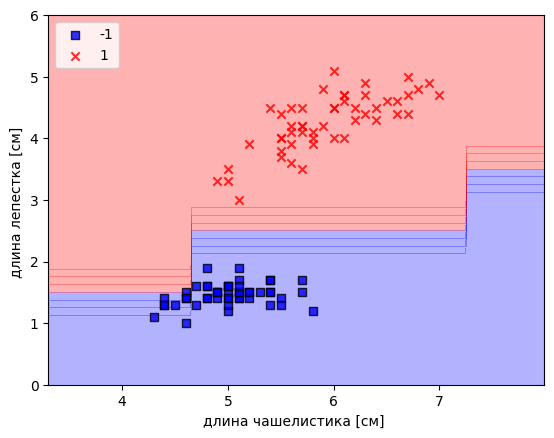

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions (X, y, classifier, resolution = 0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('b','r','y', 'g', 'lime')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0] .min() - 1, X[ :, 0] .max() + 1
    x2_min, x2_max = X[:, 1] .min() - 1, X[:, 1] .max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]). T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate (np.unique(y)): #cl- class, np. unique Возвращает уникальные значения массива y (например, метки классов 0, 1, 2 и т.д.).
 #Это могут быть числа или строки, в зависимости от того, как кодировались классы.
       plt.scatter (x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c=colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel ( 'длина чашелистика [см] ' )
plt.ylabel ('длина лепестка [см] ' )
plt.legend (loc='upper left')
plt.show () 

Text(0.5, 1.0, 'Adaline - скорость обуч. 0.0001')

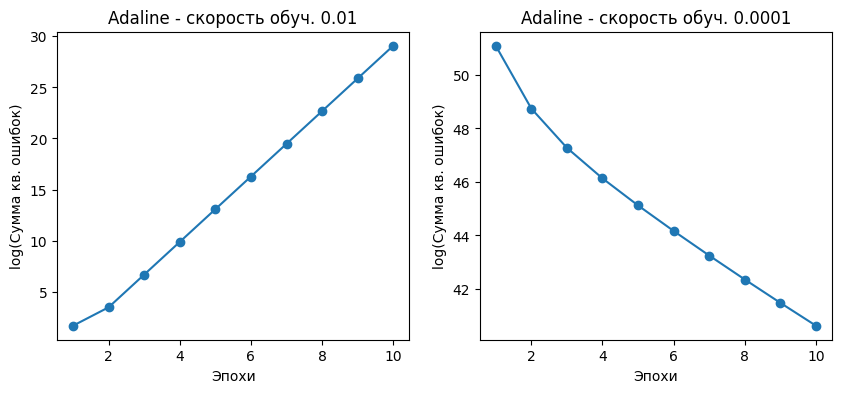

In [9]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y): #X: Матрица признаков, где строки — это примеры, а столбцы — это признаки. #y: Массив целевых значений (меток), которые модель пытается предсказать.
        rgen = np.random.RandomState(self.random_state) #Генератор случайных чисел для инициализации весов 𝑤.
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) #Вектор весов, который инициализируется случайными значениями из нормального распределения. Размер: 
#1+количество признаков1+количество признаков (добавляется дополнительный вес для смещения 𝑤0).
        self.cost_ = [] #Список, в который записывается значение функции издержек (SSE) на каждой итерации обучения.
        for i in range (self.n_iter): 
            net_input = self.net_input(X) #Вычисляет линейную комбинацию признаков и весов: 𝑧=𝑋⋅𝑤+𝑤0
            output = self.activation(net_input) #Функция активации возвращает 𝑧 без изменений (линейная активация: 𝑓(𝑧)=𝑧
            errors = (y - output) #Вычисляются ошибки (разница между истинным значением 𝑦 и предсказанным 𝑜𝑢𝑡𝑝𝑢𝑡
            self.w_[1:] += self.eta * X.T.dot(errors) #Обновляются веса, связанные с признаками, на основе правил градиентного спуска:𝑤𝑗=𝑗+𝜂⋅∑(𝑖=1)𝑁
#(𝑦(𝑖)−𝑦^(𝑖))⋅𝑥𝑗(𝑖) Здесь 𝑋.𝑇⋅errors— это матричное произведение, эффективно вычисляющее сумму произведений ошибок на значения признаков.
            self.w_[0] += self.eta * errors.sum() #Обновляется смещение (bias) 𝑤0 отдельно, так как для него нет признаков.
            cost = (errors**2).sum()/2.0 #Вычисляется значение функции издержек (суммы квадратов ошибок) для текущей эпохи:𝐽(𝑤)=1/2(∑(𝑖=1)𝑁(y(i)
# - ^y(i))^2Деление на 2 добавляется для удобства при вычислении градиента.
            self.cost_.append(cost) # Добавляет значение функции издержек в список, чтобы отслеживать прогресс обучения.
        return self
    def net_input(self, X): 
        return np.dot(X, self.w_[1:]) + self.w_[0] # вычисляет z, линейную комбинацию входных данных и весов: z = X * w + w0
    def activation(self, X): 
        return X # в Adaline функция активации является линейной f(z) = z и просто возвращает z
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>= 0.0 , 1, -1) # сначала вычилесляется линейная комбинация z и применяется активация 
# затем используется правило порога для активации правило порога для класса для классиф. if z > 0 = 1 , if z < 0 = -1 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ada1 = AdalineGD(n_iter=10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма кв. ошибок)')
ax[0].set_title('Adaline - скорость обуч. 0.01')

ada2 = AdalineGD(n_iter=10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(Сумма кв. ошибок)')
ax[1].set_title('Adaline - скорость обуч. 0.0001')   
    

C:\Temp\ipykernel_14068\1426379827.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter (x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c=colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')


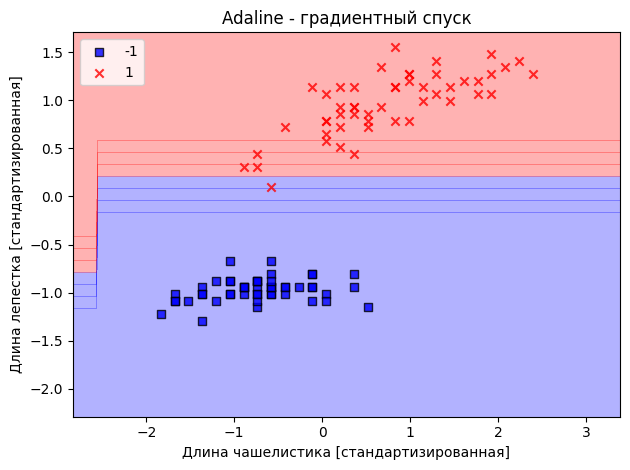

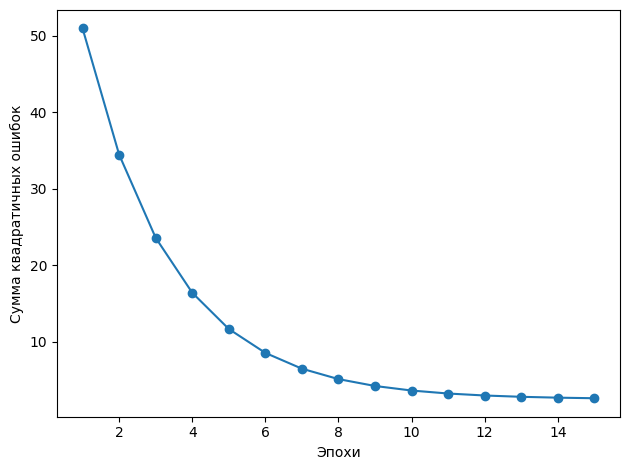

In [10]:
X_std = np.copy(X)  # Копируем X, чтобы сохранить оригинальные данные

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  # Нормализация 1-го столбца
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  # Нормализация 2-го столбца

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

# Визуализация границ решений
plot_decision_regions(X_std, y, classifier=ada_gd) #Создаётся последовательность чисел от 1 до количества эпох обучения (len(ada_gd.cost_)).
#Мы начинаем отсчёт с 1, так как эпохи нумеруются с 1, а range() по умолчанию начинается с 0.
#ada_gd.cost_-Это массив суммарных квадратичных ошибок на каждой эпохе (его формирует модель AdalineGD во время обучения).
plt.title('Adaline - градиентный спуск')
plt.xlabel('Длина чашелистика [стандартизированная]')
plt.ylabel('Длина лепестка [стандартизированная]')
plt.legend(loc='upper left')
plt.tight_layout()#Эта команда автоматически настраивает расположение графика, чтобы:
#Оси, подписи и заголовки не накладывались друг на друга.
#График корректно масштабировался на экране
plt.show()

# График изменения ошибки (cost) от числа эпох
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадратичных ошибок')
plt.tight_layout()
plt.show()


C:\Temp\ipykernel_14068\1426379827.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter (x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c=colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')


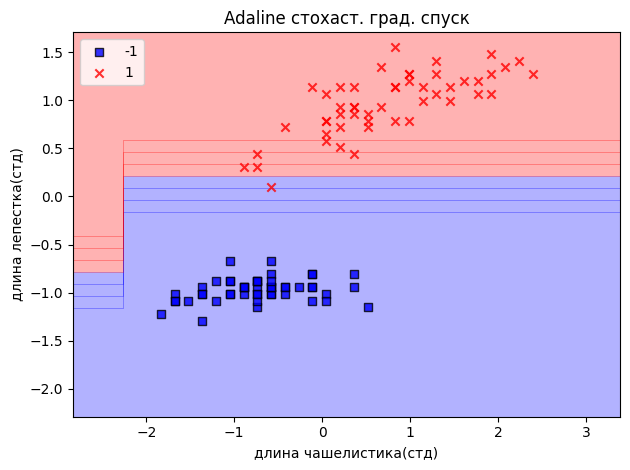

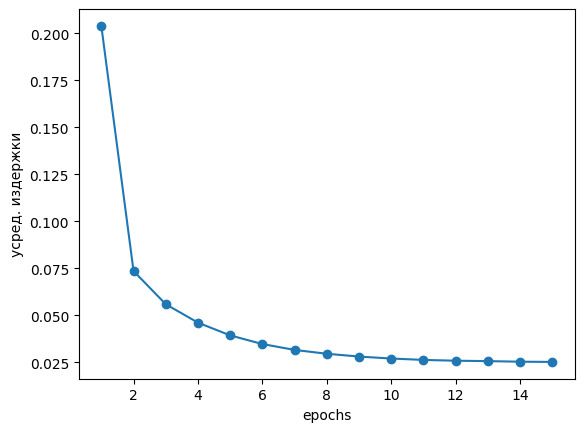

In [17]:
class AdalineSGD(object):#Объект — это конкретный предмет, созданный по этому чертежу.
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter 
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    def fit(self, X, y):
        self._initialized_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self,X, y):
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip (X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self 
    def _shuffle (self, X,y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    def _initialized_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_= self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2 
        return cost
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation (self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
ada_sgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline стохаст. град. спуск')
plt.xlabel('длина чашелистика(стд)')
plt.ylabel('длина лепестка(стд)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('усред. издержки')
plt.show()          
